In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import cv2
from tensorflow.keras.layers import Dense, Activation, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential

In [2]:
# Preparing our data
df = pd.read_csv(r'C:\Users\ambou\Machine-Learning\data\train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [3]:
data = []
def create_data():
    # Finding the image path
    for i in range(len(df)):
        path = ''
        if df.iloc[i,1] == 0:
            path = os.path.join(r'C:\Users\ambou\Machine-Learning\data\gaussian_filtered_images\gaussian_filtered_images\No_DR',
                                df.iloc[i,0] + '.png')
        elif df.iloc[i,1] == 1:
            path = os.path.join(r'C:\Users\ambou\Machine-Learning\data\gaussian_filtered_images\gaussian_filtered_images\Mild',
                                df.iloc[i,0] + '.png')
        elif df.iloc[i,1] == 2:
            path = os.path.join(r'C:\Users\ambou\Machine-Learning\data\gaussian_filtered_images\gaussian_filtered_images\Moderate',
                                df.iloc[i,0] + '.png')
        elif df.iloc[i,1] == 3:
            path = os.path.join(r'C:\Users\ambou\Machine-Learning\data\gaussian_filtered_images\gaussian_filtered_images\Severe',
                                df.iloc[i,0] + '.png')
        elif df.iloc[i,1] == 4:
            path = os.path.join(r'C:\Users\ambou\Machine-Learning\data\gaussian_filtered_images\gaussian_filtered_images\Proliferate_DR',
                                df.iloc[i,0] + '.png')
        img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE) # Reading and converting image into array
        data.append([img_array, df.iloc[i,1]]) # Adding all images (as arrays) and labels into data
create_data()

In [4]:
random.shuffle(data)  # Shuffling data
X = []
y = []

for pic, label in data: # Appending data to X and y labels
    X.append(pic)
    y.append(label)

In [5]:
X = np.asarray(X).reshape(-1, 224,224,1) # Converting X from a list into an array
X = X / 255 # Normalizing X to be within values of 0-1

In [6]:
y_array = np.asarray(y)
y_positive = np.where(y_array != 0, 1, 0) # Creating training set to distinguish between someone who has DR or not

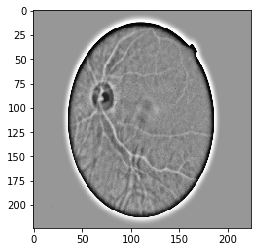

In [41]:
plt.imshow(X[0].reshape(224,224), cmap='Greys')

In [8]:
# Splitting our data
X_train, y_positive_train, X_test, y_positive_test = X[:3000], y_positive[:3000], X[3000:], y_positive[3000:]

In [9]:
# Modeling time
model = Sequential() # Normal Sequential Model
num_conv_layers = 3
num_dense_layers = 3

for layer in range(num_conv_layers):
    model.add(Conv2D(128, (5,5), input_shape = X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Flatten())

for layer in range(num_dense_layers):
    model.add(Dense(128))
    model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 128)     3328      
_________________________________________________________________
activation (Activation)      (None, 220, 220, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       409728    
_________________________________________________________________
activation_1 (Activation)    (None, 69, 69, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       4

In [11]:
model.fit(X_train, y_positive_train, batch_size=50, epochs=10, validation_split=0.1)

Train on 2700 samples, validate on 300 samples
Epoch 1/10
2700/2700 [==============================] - 12s 4ms/sample - loss: 0.4912 - accuracy: 0.7544 - val_loss: 0.3060 - val_accuracy: 0.8767
Epoch 2/10
2700/2700 [==============================] - 10s 4ms/sample - loss: 0.2536 - accuracy: 0.9004 - val_loss: 0.2735 - val_accuracy: 0.8967
Epoch 3/10
2700/2700 [==============================] - 10s 4ms/sample - loss: 0.2323 - accuracy: 0.9178 - val_loss: 0.2619 - val_accuracy: 0.8933
Epoch 4/10
2700/2700 [==============================] - 10s 4ms/sample - loss: 0.2105 - accuracy: 0.9200 - val_loss: 0.2598 - val_accuracy: 0.9033
Epoch 5/10
2700/2700 [==============================] - 10s 4ms/sample - loss: 0.1990 - accuracy: 0.9274 - val_loss: 0.2322 - val_accuracy: 0.9033
Epoch 6/10
2700/2700 [==============================] - 10s 4ms/sample - loss: 0.1914 - accuracy: 0.9322 - val_loss: 0.2608 - val_accuracy: 0.8967
Epoch 7/10
2700/2700 [==============================] - 10s 4ms/sample 

In [19]:
loss, acc = model.evaluate(X_test, y_positive_test)

662/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
print('Model test loss: {}'.format(loss), 'Model test accuracy: {}'.format(acc), sep ='\n**************************\n')

Model test loss: 0.15559023037958
**************************
Model test accuracy: 0.9456193447113037
